In [1]:
from IPython.core.display import display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [3]:
import matplotlib
matplotlib.font_manager._rebuild()

In [4]:
train = pd.read_csv('./date/train.csv')
test = pd.read_csv('./date/test.csv')

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
print(train.shape)
train

(207, 12)


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [6]:
print(test.shape)
test

(40, 11)


,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1
5,2014-10-8,水,0,完熟トマトのホットカレー,420.0,NaN,NaN,NaN,晴れ,--,23.3
6,2014-10-9,木,0,豚キムチ炒め,435.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.5
7,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1
8,2014-10-14,火,0,若鶏梅肉包揚げ,408.0,NaN,NaN,NaN,快晴,--,26.8
9,2014-10-15,水,1,ミックスグリル,450.0,料理長のこだわりメニュー,NaN,NaN,雨,1.5,15.6


In [7]:
# データ型を確認
print( train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB
None


In [8]:
# データ型を確認
print( test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       40 non-null     object 
 1   week           40 non-null     object 
 2   soldout        40 non-null     int64  
 3   name           40 non-null     object 
 4   kcal           36 non-null     float64
 5   remarks        7 non-null      object 
 6   event          3 non-null      object 
 7   payday         2 non-null      float64
 8   weather        40 non-null     object 
 9   precipitation  40 non-null     object 
 10  temperature    40 non-null     float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ KB
None


In [9]:
# 欠損値を確認
print(train.isnull().sum())
print()
print(test.isnull().sum())

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

datetime          0
week              0
soldout           0
name              0
kcal              4
remarks          33
event            37
payday           38
weather           0
precipitation     0
temperature       0
dtype: int64


In [10]:
#存在する値とその数をカウント
print( train['remarks'].value_counts() )
print()
print( test['remarks'].value_counts() )

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64

お楽しみメニュー          4
料理長のこだわりメニュー      2
近隣に飲食店複合ビルオープン    1
Name: remarks, dtype: int64


In [11]:
#存在する値とその数をカウント
print(train['event'].value_counts())
print()
print(test['event'].value_counts())

ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64

キャリアアップ支援セミナー    2
ママの会             1
Name: event, dtype: int64


In [12]:
#存在する値とその数をカウント
print(train['payday'].value_counts())
print()
print(test['payday'].value_counts())

1.0    10
Name: payday, dtype: int64

1.0    2
Name: payday, dtype: int64


In [13]:
#存在する値とその数をカウント
print(train['precipitation'].value_counts())
print()
print(test['precipitation'].value_counts())

--     169
0       23
0.5      9
1.5      2
6        1
6.5      1
2.5      1
1        1
Name: precipitation, dtype: int64

--     31
0       4
0.5     2
1.5     2
1       1
Name: precipitation, dtype: int64


In [14]:
# 基本統計量を表示
print(train.describe())
print()
print(test.describe())

                y     soldout        kcal  payday  temperature
count  207.000000  207.000000  166.000000    10.0   207.000000
mean    86.623188    0.449275  404.409639     1.0    19.252174
std     32.882448    0.498626   29.884641     0.0     8.611365
min     29.000000    0.000000  315.000000     1.0     1.200000
25%     57.000000    0.000000  386.000000     1.0    11.550000
50%     78.000000    0.000000  408.500000     1.0    19.800000
75%    113.000000    1.000000  426.000000     1.0    26.100000
max    171.000000    1.000000  462.000000     1.0    34.600000

         soldout        kcal  payday  temperature
count  40.000000   36.000000     2.0    40.000000
mean    0.425000  421.083333     1.0    18.665000
std     0.500641   13.626392     0.0     4.401838
min     0.000000  396.000000     1.0     9.200000
25%     0.000000  411.500000     1.0    15.250000
50%     0.000000  420.000000     1.0    19.000000
75%     1.000000  428.500000     1.0    21.650000
max     1.000000  460.000000    

In [15]:
# object型の基本統計量を表示
print(train.describe(include=["O"]))
print()
print(test.describe(include=["O"]))

         datetime week      name   remarks event weather precipitation
count         207  207       207        21    14     207           207
unique        207    5       156         6     2       7             8
top     2014-7-23    水  タンドリーチキン  お楽しみメニュー  ママの会      快晴            --
freq            1   43         6        12     9      53           169

          datetime week  name   remarks          event weather precipitation
count           40   40    40         7              3      40            40
unique          40    5    38         3              2       5             5
top     2014-10-16    木  麻婆豆腐  お楽しみメニュー  キャリアアップ支援セミナー      快晴            --
freq             1    9     2         4              2      12            31


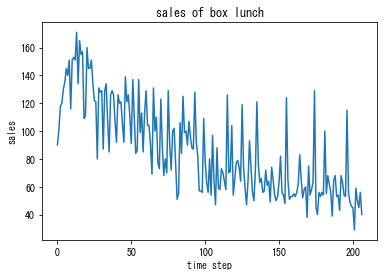

In [16]:
# 折れ線グラフの描画
train['y'].plot( title="sales of box lunch" )

# x軸とy軸にラベルを付けて表示
plt.xlabel("time step")
plt.ylabel("sales")
plt.show()

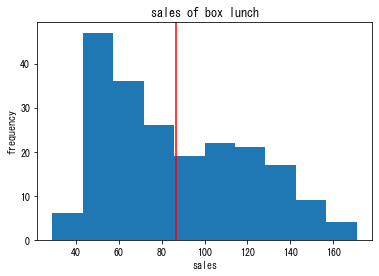

In [17]:
# ヒストグラムの描画
train['y'].plot.hist( title="sales of box lunch" )

# x軸とy軸にラベルを付け
plt.xlabel("sales")
plt.ylabel("frequency")

# 平均値を赤線で表示させる
plt.axvline(x=train["y"].mean(), color="red")

# グラフの表示
plt.show()

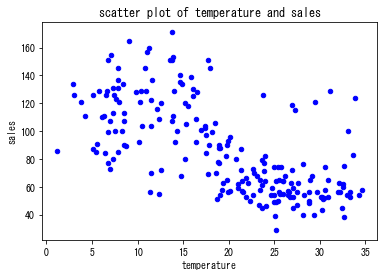

In [18]:
# 散布図の描画
train.plot.scatter( x='temperature', y='y', c="blue", title="scatter plot of temperature and sales" )

# x軸とy軸にラベルを付け
plt.xlabel("temperature")
plt.ylabel("sales")

# グラフの表示
plt.show()

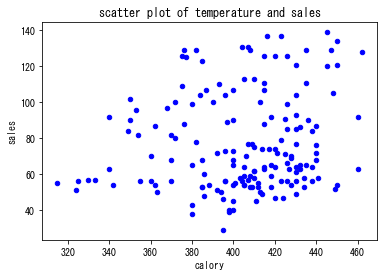

In [19]:
# 散布図の描画
train.plot.scatter( x='kcal', y='y', c="blue", title="scatter plot of temperature and sales" )

# x軸とy軸にラベルを付け
plt.xlabel("calory")
plt.ylabel("sales")

# グラフの表示
plt.show()

In [20]:
# 販売数・気温・カロリーの各変数間の相関係数を表示
print( train[["y","temperature","kcal"]].corr())

                    y  temperature      kcal
y            1.000000    -0.655332  0.147269
temperature -0.655332     1.000000 -0.046191
kcal         0.147269    -0.046191  1.000000


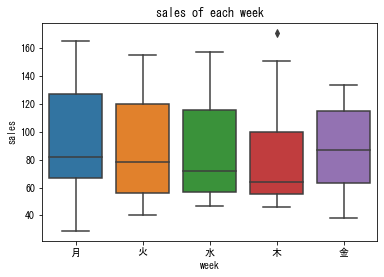

In [21]:
# 箱ひげ図の描画（表示順序をorderで指定している）
sns.boxplot( x='week', y='y', data=train, order=["月","火","水","木","金"] )

# y軸にラベルを付け
plt.title("sales of each week")
plt.ylabel("sales")

# グラフの表示
plt.show()

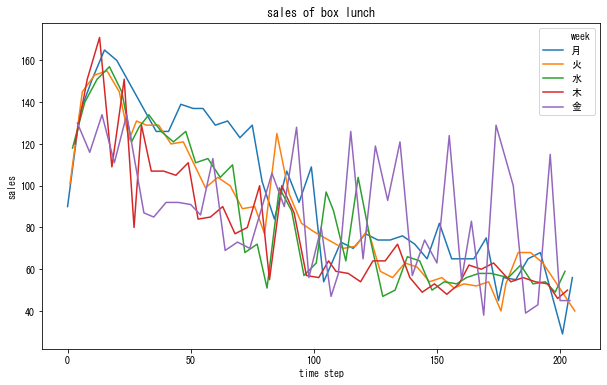

In [22]:
# グラフのサイズを指定して、折れ線グラフの描画
plt.figure(figsize=(10,6))
sns.lineplot( x=train.index, y='y', hue='week', data=train )

# x軸・y軸にラベルを付け
plt.xlabel("time step")
plt.ylabel("sales")
# タイトルを付け
plt.title("sales of box lunch")

# グラフの表示
plt.show()

In [23]:
# remarksカラムの欠損値を埋める
train["remarks"].fillna("特記なし", inplace=True)
test["remarks"].fillna("特記なし", inplace=True)

# eventカラムの欠損値を埋める
train["event"].fillna("イベントなし", inplace=True)
test["event"].fillna("イベントなし", inplace=True)

# paydayカラムの欠損値を埋める
train["payday"].fillna(0, inplace=True)
test["payday"].fillna(0, inplace=True)

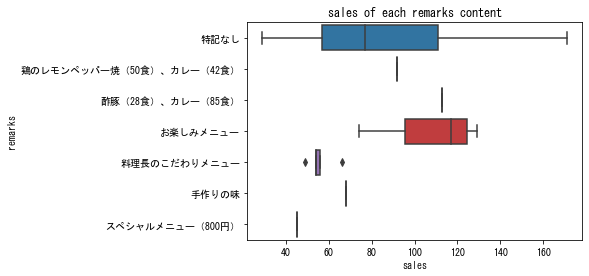

In [24]:
# 箱ひげ図
sns.boxplot(x='y', y='remarks', data=train)

# x軸にラベルを付けて表示
plt.title("sales of each remarks content")
plt.xlabel("sales")
plt.show()

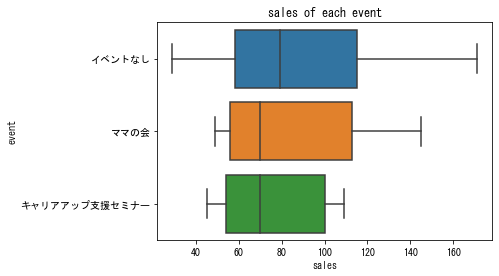

In [25]:
# 箱ひげ図
sns.boxplot(x='y', y='event', data=train)

# x軸にラベルを付けて表示
plt.title("sales of each event")
plt.xlabel("sales")
plt.show()

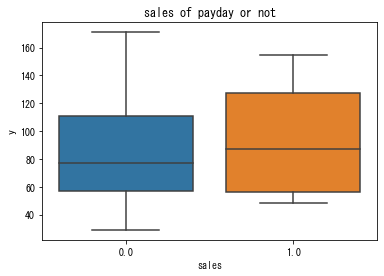

In [26]:
# 箱ひげ図
sns.boxplot(x='payday', y='y', data=train)

# x軸にラベルを付けて表示
plt.title("sales of payday or not")
plt.xlabel("sales")
plt.show()

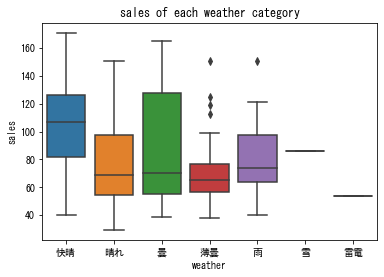

In [27]:
# 箱ひげ図（表示の順番をorderで指定）
sns.boxplot(x='weather', y='y', data=train, order=["快晴","晴れ","曇","薄曇","雨","雪","雷電"])

# y軸にラベルを付けて表示
plt.title("sales of each weather category")
plt.ylabel("sales")
plt.show()

In [28]:
# 行の抽出と表示
rows = train[ train["remarks"]=="お楽しみメニュー"]
print( rows )

      datetime    y week  soldout              name  kcal   remarks   event  \
83   2014-3-28  106    金        0            キーマカレー   NaN  お楽しみメニュー  イベントなし   
93   2014-4-11  128    金        1            チキンカレー   NaN  お楽しみメニュー  イベントなし   
103  2014-4-25   80    金        0               中華丼   NaN  お楽しみメニュー  イベントなし   
115  2014-5-16  126    金        0            ポークカレー   NaN  お楽しみメニュー    ママの会   
125  2014-5-30  119    金        0            チキンカレー   NaN  お楽しみメニュー  イベントなし   
135  2014-6-13  121    金        0            キーマカレー   NaN  お楽しみメニュー  イベントなし   
145  2014-6-27   74    金        0                牛丼   NaN  お楽しみメニュー  イベントなし   
155  2014-7-11  124    金        0            ポークカレー   NaN  お楽しみメニュー  イベントなし   
164  2014-7-25   83    金        0  ひやしたぬきうどん・炊き込みご飯   NaN  お楽しみメニュー  イベントなし   
174   2014-8-8  129    金        0            チキンカレー   NaN  お楽しみメニュー  イベントなし   
181  2014-8-22  100    金        1             ロコモコ丼   NaN  お楽しみメニュー  イベントなし   
196  2014-9-12  115    金        0            ポークカレー 

In [29]:
# カラムweatherの値が「快晴」の行だけを表示
print(train[ train["weather"]== "快晴"])

       datetime    y week  soldout             name   kcal  \
0    2013-11-18   90    月        0         厚切りイカフライ    NaN   
1    2013-11-19  101    火        1          手作りヒレカツ    NaN   
2    2013-11-20  118    水        0       白身魚唐揚げ野菜あん    NaN   
3    2013-11-21  120    木        1           若鶏ピリ辛焼    NaN   
4    2013-11-22  130    金        1         ビッグメンチカツ    NaN   
6    2013-11-26  145    火        0         豚のスタミナ炒め    NaN   
9    2013-11-29  116    金        0    タルタルinソーセージカツ    NaN   
10    2013-12-2  151    月        1            マーボ豆腐    NaN   
11    2013-12-3  153    火        1         厚揚げ豚生姜炒め    NaN   
13    2013-12-5  171    木        0      鶏のカッシュナッツ炒め    NaN   
14    2013-12-6  134    金        0         手作りロースカツ    NaN   
18   2013-12-12  109    木        0             肉じゃが    NaN   
19   2013-12-13  111    金        1         タンドリーチキン    NaN   
20   2013-12-16  160    月        0        カキフライタルタル    NaN   
25   2013-12-24  122    火        0        さっくりメンチカツ    NaN   
26   201

In [30]:
# 新しいカラム「flag」を作成
train['flag'] = 1
test['flag'] = 0

# 縦方向に結合
data = pd.concat([train, test])

# インデックスのリセット
data = data.reset_index(drop=True)
data.head() 

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,flag
0,2013-11-18,90.0,月,0,厚切りイカフライ,NaN,特記なし,イベントなし,0.0,快晴,--,19.8,1
1,2013-11-19,101.0,火,1,手作りヒレカツ,NaN,特記なし,イベントなし,0.0,快晴,--,17.0,1
2,2013-11-20,118.0,水,0,白身魚唐揚げ野菜あん,NaN,特記なし,イベントなし,0.0,快晴,--,15.5,1
3,2013-11-21,120.0,木,1,若鶏ピリ辛焼,NaN,特記なし,イベントなし,0.0,快晴,--,15.2,1
4,2013-11-22,130.0,金,1,ビッグメンチカツ,NaN,特記なし,イベントなし,0.0,快晴,--,16.1,1


In [31]:
# 雪と雷電を雨に変換
data["weather"] = data["weather"].apply(lambda x: "雨" if x == "雪" or x == "雷電" else x)

In [32]:
# 「お楽しみメニュー」かつ「カレー」を判定
data["remarks"] = data.apply(lambda x: 1 if x["remarks"] == "お楽しみメニュー" and "カレー" in x["name"] else 0, axis=1)
data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,flag
0,2013-11-18,90.0,月,0,厚切りイカフライ,NaN,0,イベントなし,0.0,快晴,--,19.8,1
1,2013-11-19,101.0,火,1,手作りヒレカツ,NaN,0,イベントなし,0.0,快晴,--,17.0,1
2,2013-11-20,118.0,水,0,白身魚唐揚げ野菜あん,NaN,0,イベントなし,0.0,快晴,--,15.5,1
3,2013-11-21,120.0,木,1,若鶏ピリ辛焼,NaN,0,イベントなし,0.0,快晴,--,15.2,1
4,2013-11-22,130.0,金,1,ビッグメンチカツ,NaN,0,イベントなし,0.0,快晴,--,16.1,1


In [33]:
# 年・月・経過日数の情報を取得
data["year"] = data["datetime"].apply(lambda x: x.split("-")[0] )
data["month"] = data["datetime"].apply(lambda x: x.split("-")[1] )
data["days"] = range(1, 1+data.shape[0])

# 整数に変換
data["year"] = data["year"].astype(np.int)
data["month"] = data["month"].astype(np.int)
data["days"] = data["days"].astype(np.int)
data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,flag,year,month,days
0,2013-11-18,90.0,月,0,厚切りイカフライ,NaN,0,イベントなし,0.0,快晴,--,19.8,1,2013,11,1
1,2013-11-19,101.0,火,1,手作りヒレカツ,NaN,0,イベントなし,0.0,快晴,--,17.0,1,2013,11,2
2,2013-11-20,118.0,水,0,白身魚唐揚げ野菜あん,NaN,0,イベントなし,0.0,快晴,--,15.5,1,2013,11,3
3,2013-11-21,120.0,木,1,若鶏ピリ辛焼,NaN,0,イベントなし,0.0,快晴,--,15.2,1,2013,11,4
4,2013-11-22,130.0,金,1,ビッグメンチカツ,NaN,0,イベントなし,0.0,快晴,--,16.1,1,2013,11,5


In [34]:
# 不要なカラムの削除
data = data.drop(columns=["datetime","week","soldout","name","kcal","event","payday","precipitation","year"])
data.head()

,y,remarks,weather,temperature,flag,month,days
0,90.0,0,快晴,19.8,1,11,1
1,101.0,0,快晴,17.0,1,11,2
2,118.0,0,快晴,15.5,1,11,3
3,120.0,0,快晴,15.2,1,11,4
4,130.0,0,快晴,16.1,1,11,5


In [35]:
data = pd.get_dummies(data)
data.head()

,y,remarks,temperature,flag,month,days,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨
0,90.0,0,19.8,1,11,1,1,0,0,0,0
1,101.0,0,17.0,1,11,2,1,0,0,0,0
2,118.0,0,15.5,1,11,3,1,0,0,0,0
3,120.0,0,15.2,1,11,4,1,0,0,0,0
4,130.0,0,16.1,1,11,5,1,0,0,0,0


In [36]:
# 重回帰モデルの初期設定
lm = LinearRegression()

In [37]:
# RMSE関数作成
def RMSE(var1, var2):
    
    # まずMSEを計算
    mse = mean_squared_error(var1, var2)
    
    # 平方根を取った値を返す
    return np.sqrt( mse )

In [38]:
# カラム名のリスト
features = ["remarks","temperature","weather_快晴","weather_晴れ","weather_曇","weather_雨"]

# 学習データ、評価データの分割
train = data[ data["flag"] == 1 ]
test = data[ data["flag"] == 0 ]

# 学習データの説明変数、目的変数
train_X = train[features]
train_y = train["y"]

# 評価データの説明変数、目的変数
test_X = test[features]
test_y = test["y"]

In [39]:
# モデルの学習
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [40]:
# 学習済みモデルlmの回帰係数を、DataFrameにして表示させる
# 説明変数の名称は変数featuresにリストで代入
print(pd.DataFrame( lm.coef_, index=features, columns=["回帰係数"]))

                  回帰係数
remarks      52.034436
temperature  -2.663869
weather_快晴    5.048221
weather_晴れ    1.746402
weather_曇    -2.530935
weather_雨    -7.937198


In [41]:
# 予測値を算出
lm = LinearRegression()
lm.fit( train_X, train_y )
pred1 = lm.predict(train_X)


In [42]:
# RMSEの計算
var = RMSE( train_y,pred1 )
print(var)

22.13007894882264


In [43]:
#関数なしRMSE
rmse = np.sqrt(mean_squared_error(train_y,pred1))
print(rmse)
print()
#R2 
r2 = r2_score(train_y,pred1)
print(r2)
print()
#MAE
mae = mean_absolute_error(train_y,pred1)
print(mae)

22.13007894882264

0.5448644390397896

16.8614507107395


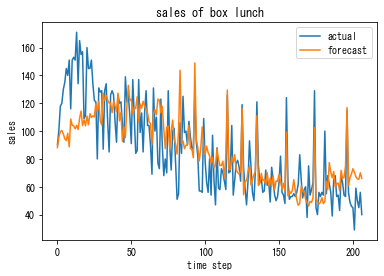

In [44]:
# 販売数の予測値は、変数pred1に代入

# 折れ線グラフを描画

# 評価データの販売数でグラフを描く
plt.plot(train_y.values, label="actual")

# 予測値でグラフを描く
plt.plot(pred1, label="forecast")

plt.title("sales of box lunch")
plt.xlabel("time step")
plt.ylabel("sales")
plt.legend()
plt.show()

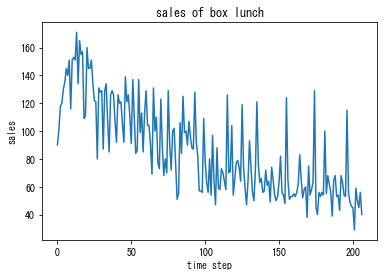

In [45]:
#販売数の推移を再描画
# 折れ線グラフの描画
train["y"].plot( title="sales of box lunch" )

# x軸とy軸にラベルを付けて表示します
plt.xlabel("time step")
plt.ylabel("sales")
plt.show()

In [46]:
# train_Xとtrain_yを、100行目以降のみに絞る。
train_X2 = train_X[100:]
train_y2 = train_y[100:]

In [47]:
# モデルを再学習する
lm = LinearRegression()
lm.fit(train_X2, train_y2)

LinearRegression()

In [48]:
# 学習済みモデルlmの回帰係数を、DataFrameにして表示
# 説明変数の名称は変数featuresにリストで代入
print(pd.DataFrame( lm.coef_, index=features, columns=["回帰係数"]))

                  回帰係数
remarks      64.400710
temperature  -0.658098
weather_快晴   -4.641771
weather_晴れ   -1.802765
weather_曇    -3.581892
weather_雨     4.772160


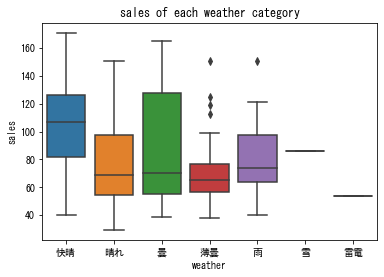

In [49]:
#天気に対する販売数の箱ひげ図を描画
# まずtrain.csvを読み直す
train = pd.read_csv('./date/train.csv')

#--箱ひげ図（表示の順番をorderで指定）
sns.boxplot(x='weather', y='y', data=train, order=["快晴","晴れ","曇","薄曇","雨","雪","雷電"])

# y軸にラベルを付けて表示
plt.title("sales of each weather category")
plt.ylabel("sales")
plt.show()

In [50]:
# 予測値を計算
lm = LinearRegression()
lm.fit(train_X2, train_y2)
pred2 = lm.predict(train_X2)

# RMSEを計算
var = RMSE(train_y2, pred2)
print(var)

11.945380831839948


In [51]:
#関数なしRMSE
rmse = np.sqrt(mean_squared_error(train_y2,pred2))
print(rmse)
print()
#R2 
r2 = r2_score(train_y2,pred2)
print(r2)
print()
#MAE
mae = mean_absolute_error(train_y2,pred2)
print(mae)

11.945380831839948

0.6083183761950953

8.97478538455405


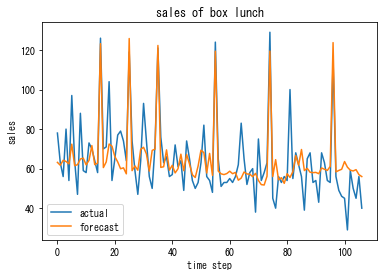

In [52]:
# 販売数の予測値は、変数pred2に代入

# 学習データの販売数でグラフを描く
plt.plot(train_y2.values, label="actual")

# 予測値でグラフを描く
plt.plot(pred2, label="forecast")

plt.title("sales of box lunch")
plt.xlabel("time step")
plt.ylabel("sales")
plt.legend()
plt.show()

In [53]:
#日付情報を追加
# カラム名のリスト
features = ["remarks","temperature","weather_快晴","weather_晴れ","weather_曇","weather_雨","month","days"]

# 学習データ、評価データの分割
train = data[ data["flag"] == 1 ]
test = data[ data["flag"] == 0 ]

# 学習データの説明変数、目的変数
train_X = train[features]
train_y = train["y"]

# 評価データの説明変数、目的変数
test_X = test[features]
test_y = test["y"]

In [54]:
# 学習データの期間を絞る
train_X = train_X[100:]
train_y = train_y[100:]

# モデルを再学習する
lm = LinearRegression()
lm.fit( train_X, train_y )

LinearRegression()

In [55]:
# 学習済みモデルlmの回帰係数を、DataFrameにして表示
# 説明変数の名称は変数featuresにリストで代入
print(pd.DataFrame( lm.coef_, index=features, columns=["回帰係数"]))

                  回帰係数
remarks      62.503954
temperature   0.117930
weather_快晴   -2.536696
weather_晴れ   -0.085862
weather_曇     2.252081
weather_雨     8.329917
month        -3.211188
days         -0.026251


In [56]:
# 予測値を計算
pred3 = lm.predict( train_X )

# RMSEを計算
var = RMSE(train_y, pred3)
print(var)

11.06062788925085


In [57]:
#関数なしRMSE
rmse = np.sqrt(mean_squared_error(train_y,pred3))
print(rmse)
print()
#R2 
r2 = r2_score(train_y,pred3)
print(r2)
print()
#MAE
mae = mean_absolute_error(train_y,pred3)
print(mae)

11.06062788925085

0.6641906688157597

8.261653890839556


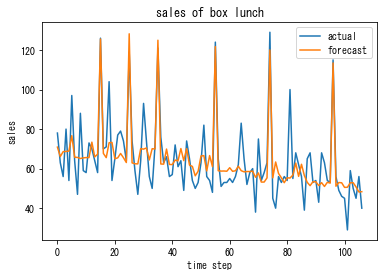

In [58]:
# 販売数の予測値は、変数pred3に代入

# 学習データの販売数でグラフを描く
plt.plot(train_y.values, label="actual")

# 予測値でグラフを描く
plt.plot(pred3, label="forecast")

plt.title("sales of box lunch")
plt.xlabel("time step")
plt.ylabel("sales")
plt.legend()
plt.show()

In [248]:
#XGB
pipe_xgb = Pipeline([('pca', PCA()),('est',xgb.XGBRegressor(random_state=0))])
pipe_xgb.fit(train_X, train_y)

pred4 =pipe_xgb.predict(train_X)

rmse = np.sqrt(mean_squared_error(train_y,pred4))
print(rmse)
print()

r2 = r2_score(train_y,pred4)
print(r2)
print()

mae = mean_absolute_error(train_y,pred4)
print(mae)

[18:29:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3.4706446713774333

0.9669361439746341

2.7208402401933047


In [60]:
#cat
pipe_cat = Pipeline([('pca', PCA()),('est',CatBoostRegressor(random_state=0))])
pipe_cat.fit(train_X, train_y)

pred5 =pipe_cat.predict(train_X)

rmse = np.sqrt(mean_squared_error(train_y,pred5))
print(rmse)
print()

r2 = r2_score(train_y,pred5)
print(r2)
print()

mae = mean_absolute_error(train_y,pred5)
print(mae)

Learning rate set to 0.02622
0:	learn: 18.9473494	total: 643ms	remaining: 10m 42s
1:	learn: 18.7628461	total: 646ms	remaining: 5m 22s
2:	learn: 18.6028382	total: 649ms	remaining: 3m 35s
3:	learn: 18.4607130	total: 651ms	remaining: 2m 42s
4:	learn: 18.3035862	total: 654ms	remaining: 2m 10s
5:	learn: 18.1894116	total: 656ms	remaining: 1m 48s
6:	learn: 18.0666569	total: 658ms	remaining: 1m 33s
7:	learn: 17.9405723	total: 661ms	remaining: 1m 21s
8:	learn: 17.8051315	total: 663ms	remaining: 1m 13s
9:	learn: 17.6171401	total: 665ms	remaining: 1m 5s
10:	learn: 17.4781236	total: 668ms	remaining: 1m
11:	learn: 17.3143216	total: 670ms	remaining: 55.1s
12:	learn: 17.1738445	total: 672ms	remaining: 51s
13:	learn: 17.0605714	total: 675ms	remaining: 47.5s
14:	learn: 16.9152130	total: 677ms	remaining: 44.5s
15:	learn: 16.7786937	total: 680ms	remaining: 41.8s
16:	learn: 16.6686859	total: 682ms	remaining: 39.4s
17:	learn: 16.5686738	total: 685ms	remaining: 37.3s
18:	learn: 16.4747531	total: 687ms	remai

164:	learn: 8.3454774	total: 1.31s	remaining: 6.62s
165:	learn: 8.3070719	total: 1.32s	remaining: 6.61s
166:	learn: 8.2864322	total: 1.32s	remaining: 6.58s
167:	learn: 8.2701480	total: 1.32s	remaining: 6.55s
168:	learn: 8.2407926	total: 1.37s	remaining: 6.76s
169:	learn: 8.2145710	total: 1.38s	remaining: 6.73s
170:	learn: 8.1771159	total: 1.38s	remaining: 6.7s
171:	learn: 8.1440764	total: 1.39s	remaining: 6.68s
172:	learn: 8.1271370	total: 1.39s	remaining: 6.66s
173:	learn: 8.1019153	total: 1.41s	remaining: 6.71s
174:	learn: 8.0705326	total: 1.42s	remaining: 6.68s
175:	learn: 8.0458171	total: 1.42s	remaining: 6.65s
176:	learn: 8.0161535	total: 1.42s	remaining: 6.61s
177:	learn: 7.9959661	total: 1.42s	remaining: 6.57s
178:	learn: 7.9646553	total: 1.42s	remaining: 6.53s
179:	learn: 7.9330401	total: 1.43s	remaining: 6.5s
180:	learn: 7.8998562	total: 1.43s	remaining: 6.46s
181:	learn: 7.8784381	total: 1.43s	remaining: 6.43s
182:	learn: 7.8624315	total: 1.43s	remaining: 6.39s
183:	learn: 7.

371:	learn: 4.6170717	total: 1.73s	remaining: 2.93s
372:	learn: 4.6096811	total: 1.74s	remaining: 2.92s
373:	learn: 4.5890837	total: 1.74s	remaining: 2.91s
374:	learn: 4.5809947	total: 1.74s	remaining: 2.9s
375:	learn: 4.5752249	total: 1.74s	remaining: 2.89s
376:	learn: 4.5621333	total: 1.74s	remaining: 2.88s
377:	learn: 4.5396440	total: 1.74s	remaining: 2.87s
378:	learn: 4.5252946	total: 1.74s	remaining: 2.86s
379:	learn: 4.5190294	total: 1.75s	remaining: 2.85s
380:	learn: 4.5118902	total: 1.75s	remaining: 2.84s
381:	learn: 4.5018692	total: 1.75s	remaining: 2.83s
382:	learn: 4.4871000	total: 1.75s	remaining: 2.82s
383:	learn: 4.4772905	total: 1.75s	remaining: 2.81s
384:	learn: 4.4689559	total: 1.75s	remaining: 2.8s
385:	learn: 4.4641994	total: 1.75s	remaining: 2.79s
386:	learn: 4.4450072	total: 1.75s	remaining: 2.78s
387:	learn: 4.4281962	total: 1.76s	remaining: 2.77s
388:	learn: 4.4243736	total: 1.76s	remaining: 2.76s
389:	learn: 4.4213980	total: 1.76s	remaining: 2.75s
390:	learn: 4.

555:	learn: 2.9755284	total: 2.02s	remaining: 1.62s
556:	learn: 2.9687945	total: 2.03s	remaining: 1.61s
557:	learn: 2.9625997	total: 2.03s	remaining: 1.61s
558:	learn: 2.9587199	total: 2.03s	remaining: 1.6s
559:	learn: 2.9470652	total: 2.03s	remaining: 1.6s
560:	learn: 2.9441899	total: 2.03s	remaining: 1.59s
561:	learn: 2.9326330	total: 2.04s	remaining: 1.59s
562:	learn: 2.9274066	total: 2.04s	remaining: 1.58s
563:	learn: 2.9197865	total: 2.04s	remaining: 1.58s
564:	learn: 2.9169256	total: 2.04s	remaining: 1.57s
565:	learn: 2.9091904	total: 2.04s	remaining: 1.57s
566:	learn: 2.9032388	total: 2.04s	remaining: 1.56s
567:	learn: 2.9009710	total: 2.04s	remaining: 1.55s
568:	learn: 2.8904235	total: 2.05s	remaining: 1.55s
569:	learn: 2.8837084	total: 2.05s	remaining: 1.54s
570:	learn: 2.8800881	total: 2.05s	remaining: 1.54s
571:	learn: 2.8754474	total: 2.05s	remaining: 1.53s
572:	learn: 2.8690674	total: 2.05s	remaining: 1.53s
573:	learn: 2.8667368	total: 2.06s	remaining: 1.52s
574:	learn: 2.

719:	learn: 2.0118739	total: 2.47s	remaining: 962ms
720:	learn: 2.0077516	total: 2.48s	remaining: 958ms
721:	learn: 2.0069949	total: 2.48s	remaining: 955ms
722:	learn: 1.9992923	total: 2.48s	remaining: 950ms
723:	learn: 1.9961555	total: 2.48s	remaining: 946ms
724:	learn: 1.9870769	total: 2.48s	remaining: 942ms
725:	learn: 1.9789362	total: 2.48s	remaining: 938ms
726:	learn: 1.9746319	total: 2.49s	remaining: 934ms
727:	learn: 1.9691474	total: 2.49s	remaining: 930ms
728:	learn: 1.9657945	total: 2.49s	remaining: 925ms
729:	learn: 1.9617216	total: 2.49s	remaining: 921ms
730:	learn: 1.9597357	total: 2.49s	remaining: 917ms
731:	learn: 1.9561089	total: 2.49s	remaining: 913ms
732:	learn: 1.9547035	total: 2.5s	remaining: 909ms
733:	learn: 1.9480738	total: 2.5s	remaining: 905ms
734:	learn: 1.9466394	total: 2.5s	remaining: 901ms
735:	learn: 1.9409659	total: 2.5s	remaining: 897ms
736:	learn: 1.9366753	total: 2.5s	remaining: 893ms
737:	learn: 1.9324083	total: 2.51s	remaining: 890ms
738:	learn: 1.924

885:	learn: 1.3702375	total: 2.77s	remaining: 357ms
886:	learn: 1.3666008	total: 2.78s	remaining: 354ms
887:	learn: 1.3620725	total: 2.78s	remaining: 350ms
888:	learn: 1.3583962	total: 2.78s	remaining: 347ms
889:	learn: 1.3560689	total: 2.78s	remaining: 344ms
890:	learn: 1.3514577	total: 2.78s	remaining: 340ms
891:	learn: 1.3466442	total: 2.78s	remaining: 337ms
892:	learn: 1.3418309	total: 2.79s	remaining: 334ms
893:	learn: 1.3384232	total: 2.79s	remaining: 331ms
894:	learn: 1.3361087	total: 2.79s	remaining: 327ms
895:	learn: 1.3336489	total: 2.79s	remaining: 324ms
896:	learn: 1.3319333	total: 2.79s	remaining: 321ms
897:	learn: 1.3298635	total: 2.79s	remaining: 317ms
898:	learn: 1.3263172	total: 2.79s	remaining: 314ms
899:	learn: 1.3221684	total: 2.8s	remaining: 311ms
900:	learn: 1.3215097	total: 2.8s	remaining: 308ms
901:	learn: 1.3166821	total: 2.8s	remaining: 304ms
902:	learn: 1.3126794	total: 2.8s	remaining: 301ms
903:	learn: 1.3082690	total: 2.8s	remaining: 298ms
904:	learn: 1.304

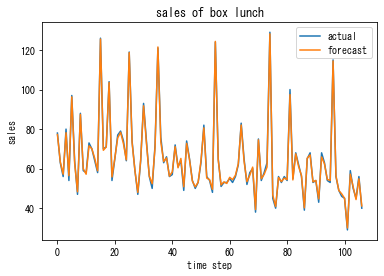

In [65]:
# 販売数の予測値は、変数pred5に代入

# 学習データの販売数でグラフを描く
plt.plot(train_y.values, label="actual")

# 予測値でグラフを描く
plt.plot(pred5, label="forecast")

plt.title("sales of box lunch")
plt.xlabel("time step")
plt.ylabel("sales")
plt.legend()
plt.show()

In [61]:
test_y = pipe_cat.predict(test_X)
test_y

array([68.99191706, 62.42685337, 61.40585792, 65.57491604, 53.85864386,
       53.30347101, 55.08346274, 80.81047488, 53.18826764, 73.57183444,
       47.33980724, 53.48853478, 45.09806974, 67.89019066, 69.651126  ,
       67.91643163, 54.62464952, 42.07918997, 49.16825776, 49.13855939,
       42.54810916, 62.3296582 , 54.28996764, 76.41646677, 58.06911638,
       83.89395375, 53.31322725, 77.852454  , 78.38504355, 54.06263452,
       54.03975153, 51.14879579, 54.03975153, 53.81127878, 76.52814449,
       53.82018796, 68.38740918, 71.82195033, 52.99250615, 75.1684966 ])

In [63]:
score = pd.read_csv('./date/sample.csv',header=None)

In [64]:
score[1] = test_y
score

,0,1
0,2014-10-1,68.991917
1,2014-10-2,62.426853
2,2014-10-3,61.405858
3,2014-10-6,65.574916
4,2014-10-7,53.858644
5,2014-10-8,53.303471
6,2014-10-9,55.083463
7,2014-10-10,80.810475
8,2014-10-14,53.188268
9,2014-10-15,73.571834


In [276]:
score.to_csv('score.csv',header=False,index=False)